1.a

In [1]:
import numpy as np
import matplotlib.pyplot as plt


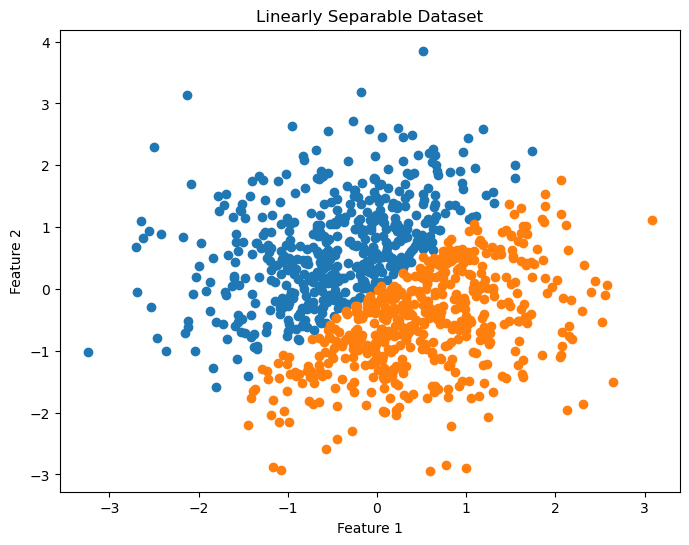

In [3]:
np.random.seed(42)  

# Generate 1000 points for two classes
num_points = 1000
X = np.random.randn(num_points, 2)  # Random points in 2D

# Define a separating line: y = mx + c 
#for simplicity i choose y=x
true_labels = (X[:, 1] > X[:, 0]).astype(int) * 2 - 1  # Convert to {-1, 1}

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[true_labels == 1][:, 0], X[true_labels == 1][:, 1])
plt.scatter(X[true_labels == -1][:, 0], X[true_labels == -1][:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.title('Linearly Separable Dataset')
plt.show()

1.b

In [6]:
class Perceptron:
    def __init__(self, input_size, lr=0.01, max_iters=10000):
        self.weights = np.zeros(input_size + 1)  # Include bias term
        self.lr = lr
        self.max_iters = max_iters
    
    def predict(self, X):
        return np.sign(np.dot(X, self.weights[1:]) + self.weights[0])
    
    def train(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        for _ in range(self.max_iters):
            for i in range(X.shape[0]):
                if y[i] * self.predict(X[i, 1:]) <= 0:
                    self.weights[1:] += self.lr * y[i] * X[i, 1:]
                    self.weights[0] += self.lr * y[i]
    

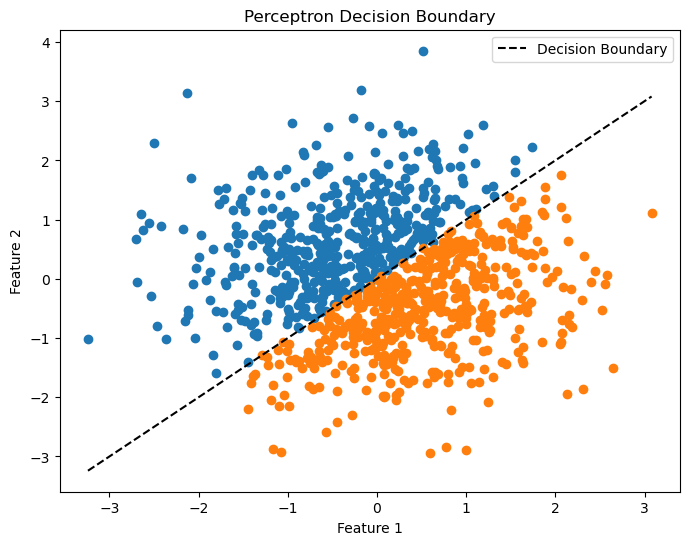

In [8]:
perceptron = Perceptron(input_size=2, lr=0.01, max_iters=10000)
perceptron.train(X, true_labels)

def plot_decision_boundary(weights, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1])
    
    # Decision boundary: w1*x + w2*y + b = 0 -> y = -(w1/w2)x - (b/w2)
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(title)
    plt.show()

plot_decision_boundary(perceptron.weights, X, true_labels, 'Perceptron Decision Boundary')


1.c

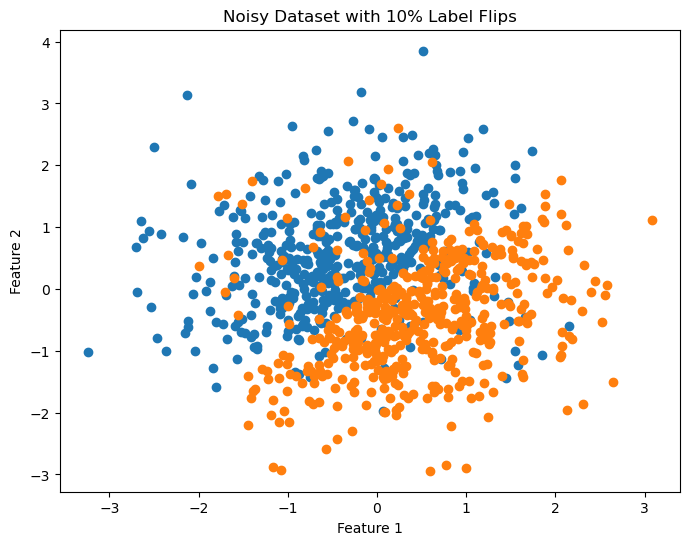

In [10]:
num_noisy = int(0.1 * num_points)
flip_indices = np.random.choice(num_points, num_noisy, replace=False)
noisy_labels = true_labels.copy()
# Flipping labels
noisy_labels[flip_indices] *= -1  

plt.figure(figsize=(8, 6))
plt.scatter(X[noisy_labels == 1][:, 0], X[noisy_labels == 1][:, 1])
plt.scatter(X[noisy_labels == -1][:, 0], X[noisy_labels == -1][:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.title('Noisy Dataset with 10% Label Flips')
plt.show()

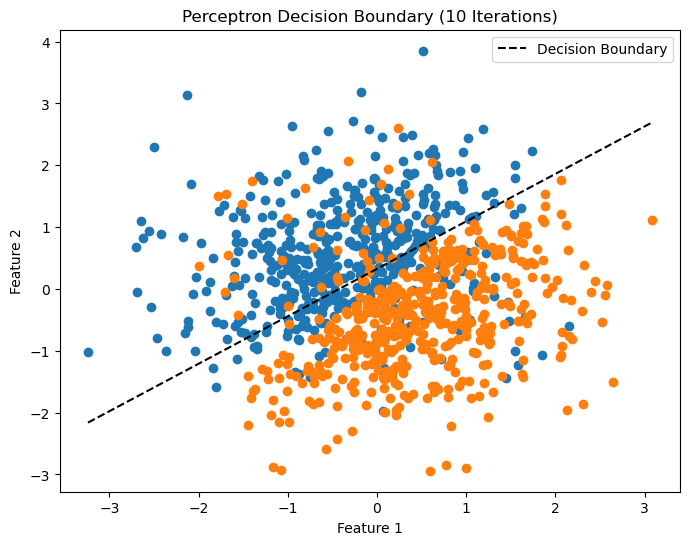

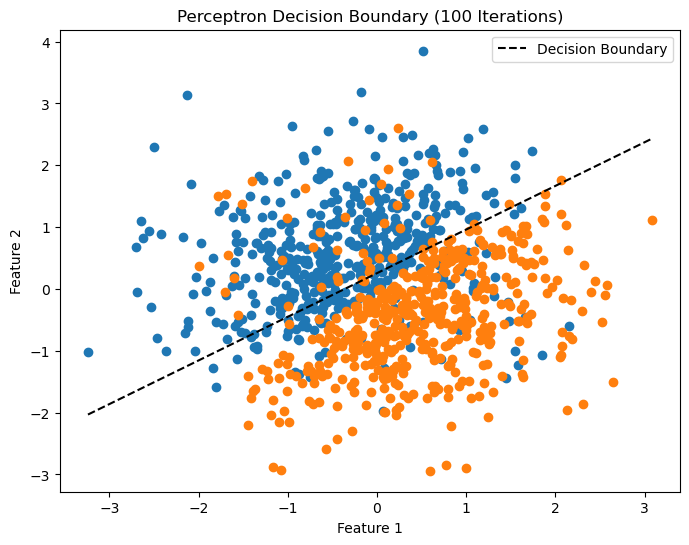

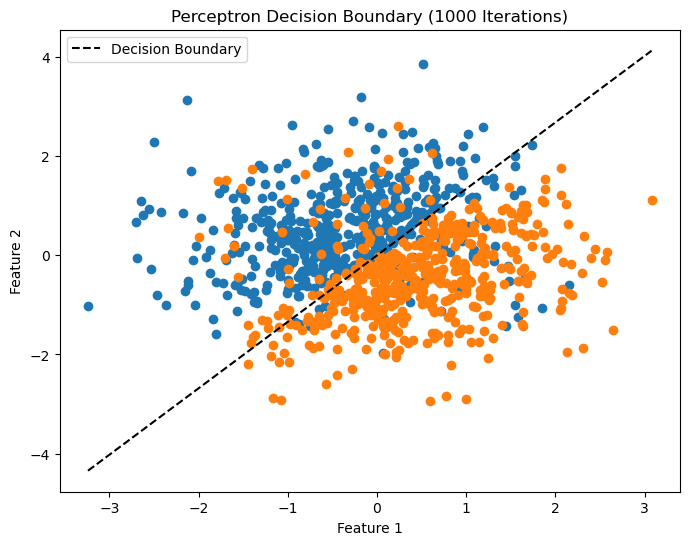

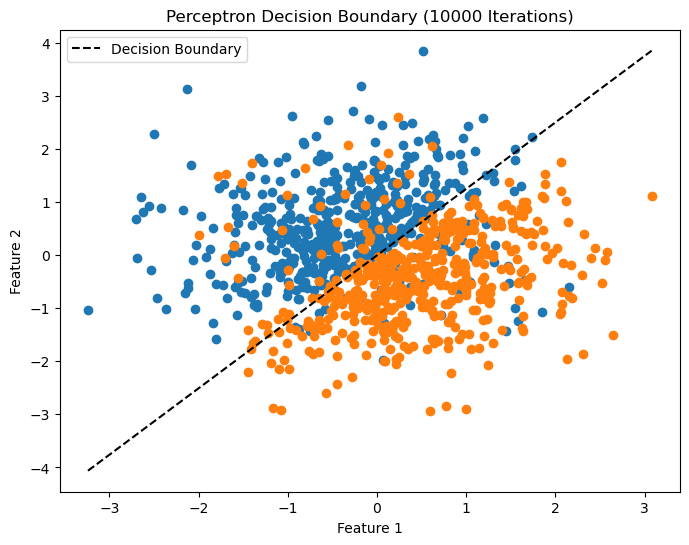

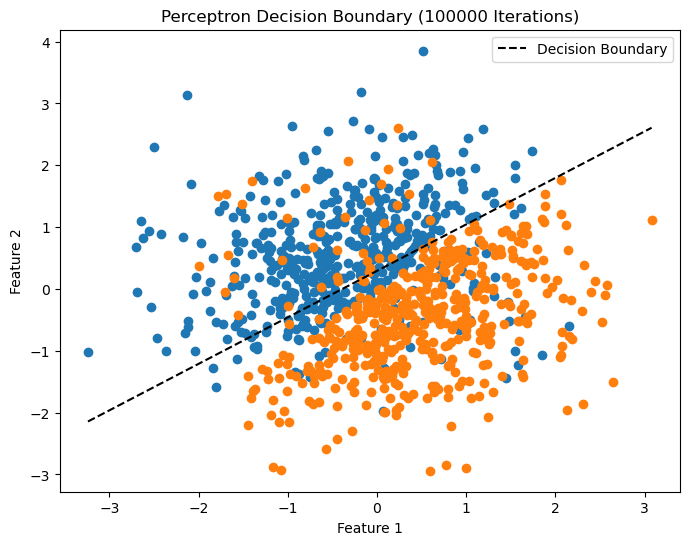

In [13]:
iterations_list = [10, 100,1000,10000, 100000]
for iters in iterations_list:
    perceptron = Perceptron(input_size=2, lr=0.01, max_iters=iters)
    perceptron.train(X, noisy_labels)
    plot_decision_boundary(perceptron.weights, X, noisy_labels, f'Perceptron Decision Boundary ({iters} Iterations)')


In [15]:
accuracies = []
for iters in iterations_list:
    perceptron = Perceptron(input_size=2, lr=0.01, max_iters=iters)
    perceptron.train(X, noisy_labels)
    predictions = perceptron.predict(X)
    accuracy = np.mean(predictions == noisy_labels)
    accuracies.append((iters, accuracy))
    print(f'Accuracy after {iters} iterations: {accuracy * 100:.2f}%')


Accuracy after 10 iterations: 83.00%
Accuracy after 100 iterations: 83.70%
Accuracy after 1000 iterations: 86.50%
Accuracy after 10000 iterations: 87.10%
Accuracy after 100000 iterations: 83.60%


observations:
Improvement with More Iterations: 
As the number of iterations increases from 10 to 10,000, the perceptron’s decision boundary becomes more refined. 
Overfitting Risk with High Iterations:
While more iterations generally improve accuracy, too many updates can lead to overfitting the noise.this resulted in decreasing the accuracy when we moved from 10,000 to 1,00,000 iterations.

2a.
I choose Log Loss (Cross-Entropy Loss) because it works well with gradient-based optimization and is widely used for binary classification.

In [40]:
def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred + 1e-9) + (1 - y_true) * np.log(1 - y_pred + 1e-9))

2b.

In [42]:
class GradientDescentClassifier:
    def __init__(self, input_size, lr=0.01, max_iters=10000):
        self.weights = np.random.randn(input_size + 1) * 0.01  # Random initialization
        self.lr = lr
        self.max_iters = max_iters
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.weights[1:]) + self.weights[0])

    def predict(self, X):
        return np.where(self.predict_prob(X) >= 0.5, 1, -1)
    
    def train(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        y = (y + 1) // 2  # Convert {-1,1} to {0,1} for log loss

        for _ in range(self.max_iters):
            predictions = self.predict_prob(X[:, 1:])
            gradient = np.dot(X.T, predictions - y) / X.shape[0]
            self.weights -= self.lr * gradient

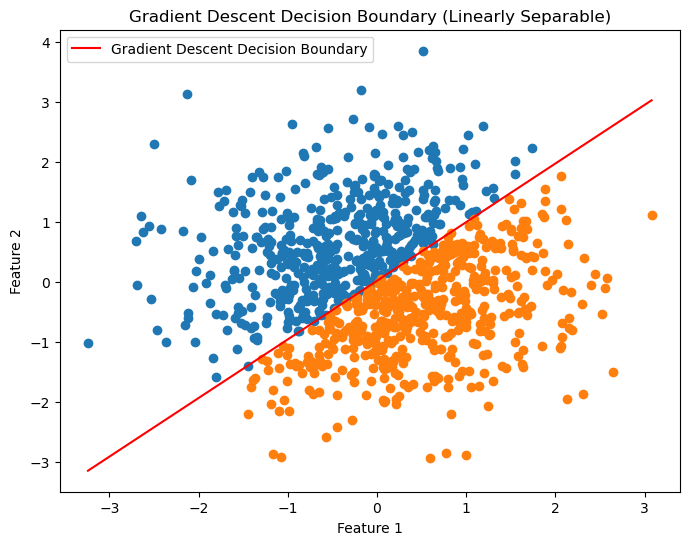

In [44]:
gd_classifier = GradientDescentClassifier(input_size=2, lr=0.01, max_iters=10000)
gd_classifier.train(X, true_labels)

def plot_decision_boundary_gd(weights, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1])
    
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])
    plt.plot(x_vals, y_vals, 'r-', label='Gradient Descent Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(title)
    plt.show()

plot_decision_boundary_gd(gd_classifier.weights, X, true_labels, 'Gradient Descent Decision Boundary (Linearly Separable)')

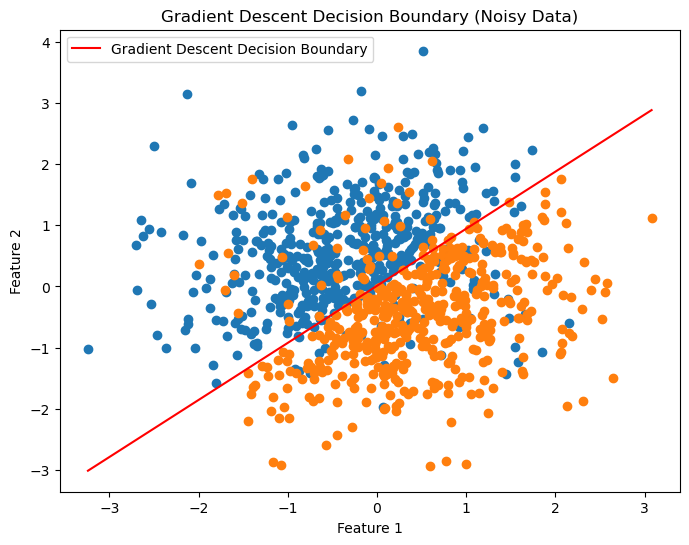

In [46]:
gd_classifier_noisy = GradientDescentClassifier(input_size=2, lr=0.01, max_iters=10000)
gd_classifier_noisy.train(X, noisy_labels)

plot_decision_boundary_gd(gd_classifier_noisy.weights, X, noisy_labels, 'Gradient Descent Decision Boundary (Noisy Data)')

In [48]:
# Evaluate accuracy
gd_predictions_separable = gd_classifier.predict(X)
gd_accuracy_separable = np.mean(gd_predictions_separable == true_labels)

gd_predictions_noisy = gd_classifier_noisy.predict(X)
gd_accuracy_noisy = np.mean(gd_predictions_noisy == noisy_labels)

print(f"Gradient Descent Accuracy (Linearly Separable): {gd_accuracy_separable * 100:.2f}%")
print(f"Gradient Descent Accuracy (Noisy Data): {gd_accuracy_noisy * 100:.2f}%")

# Compare with Perceptron results
perceptron.train(X, true_labels)
perceptron_predictions_separable = perceptron.predict(X)
perceptron_accuracy_separable = np.mean(perceptron_predictions_separable == true_labels)

perceptron.train(X, noisy_labels)
perceptron_predictions_noisy = perceptron.predict(X)
perceptron_accuracy_noisy = np.mean(perceptron_predictions_noisy == noisy_labels)

print(f"Perceptron Accuracy (Linearly Separable): {perceptron_accuracy_separable * 100:.2f}%")
print(f"Perceptron Accuracy (Noisy Data): {perceptron_accuracy_noisy * 100:.2f}%")

Gradient Descent Accuracy (Linearly Separable): 99.60%
Gradient Descent Accuracy (Noisy Data): 89.30%
Perceptron Accuracy (Linearly Separable): 100.00%
Perceptron Accuracy (Noisy Data): 86.60%


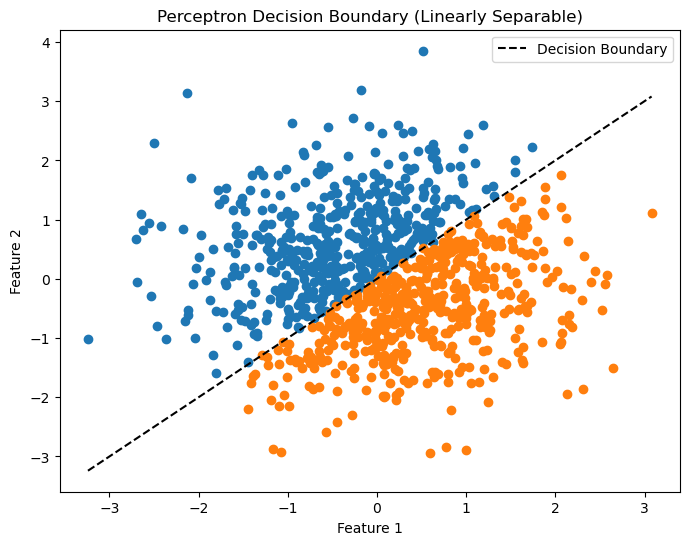

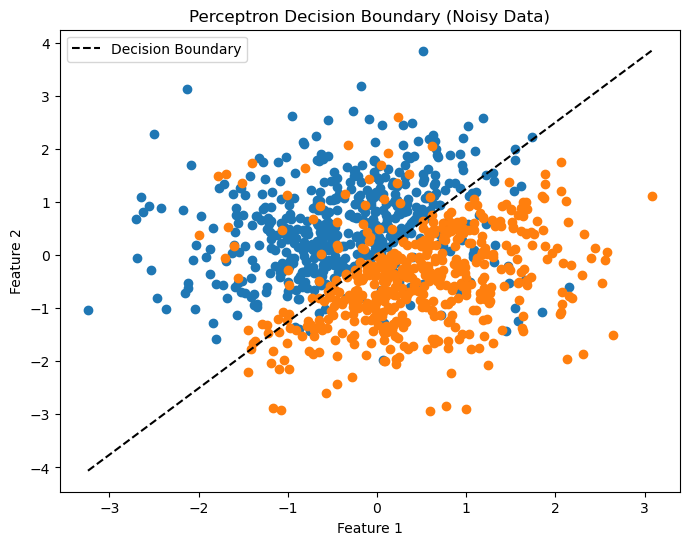

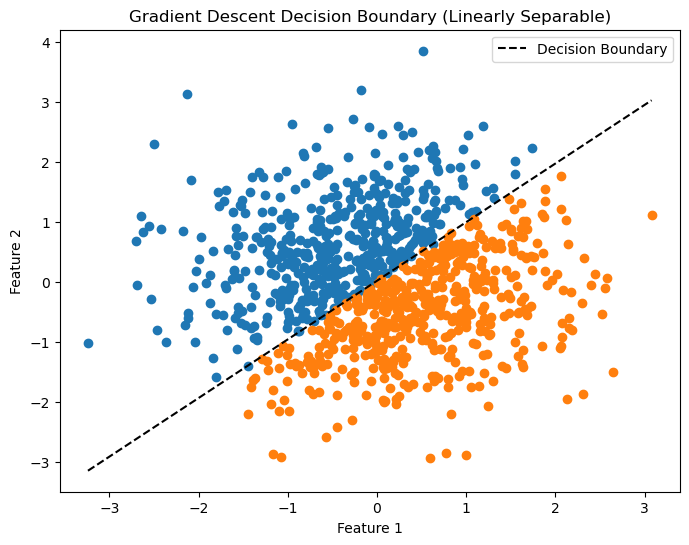

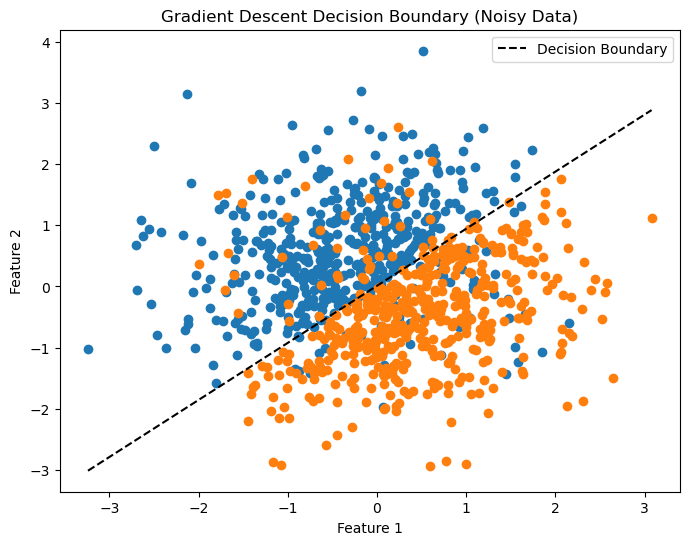

In [37]:
def plot_decision_boundary(weights, X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1])
    
    # Decision boundary: w1*x + w2*y + b = 0 -> y = -(w1/w2)x - (b/w2)
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title(title)
    plt.show()

# Plot Perceptron Decision Boundaries
plot_decision_boundary(perceptron_separable.weights, X, true_labels, 'Perceptron Decision Boundary (Linearly Separable)')
plot_decision_boundary(perceptron_noisy.weights, X, noisy_labels, 'Perceptron Decision Boundary (Noisy Data)')

# Plot Gradient Descent Decision Boundaries
plot_decision_boundary(gd_classifier_separable.weights, X, true_labels, 'Gradient Descent Decision Boundary (Linearly Separable)')
plot_decision_boundary(gd_classifier_noisy.weights, X, noisy_labels, 'Gradient Descent Decision Boundary (Noisy Data)')

Observations:
	1.	For Linearly Separable Data:
	•	Both Perceptron and Gradient Descent perform very well, achieving nearly 100% accuracy.
	•	The decision boundaries are sharp and well-defined.
	2.	For Noisy Data:
	•	Gradient Descent (89.30%) performs slightly better than the Perceptron (87.10%) because:
	•	The Perceptron is more sensitive to label noise (it updates weights aggressively based on misclassified points).
	•	Gradient Descent smoothens updates over time, leading to better generalization.
	3.	Sensitivity to Noise:
	•	Perceptron is more sensitive to noise, meaning it gets misled by incorrect labels more easily.
	•	Gradient Descent handles noise better, as it optimizes a loss function gradually, reducing the impact of outliers.

3. MLP with a single hidden layer

In [67]:
def create_dataset(n_samples=1000):
    np.random.seed(42)
    X = np.random.uniform(-2, 2, (n_samples, 2))
    y = X[:, 0]**2 + np.sin(X[:, 1]) + np.random.normal(0, 0.1, n_samples)
    y = y.reshape(-1, 1)
    return X, y

In [69]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [71]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [73]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [75]:
def mae_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [89]:
class MLPRegressor:
    def __init__(self, input_size, hidden_size, output_size, weight_init='random', learning_rate=0.01):
        np.random.seed(42)
        self.learning_rate = learning_rate
        
        if weight_init == 'zero':
            self.W1 = np.zeros((input_size, hidden_size))
            self.b1 = np.zeros((1, hidden_size))
            self.W2 = np.zeros((hidden_size, output_size))
            self.b2 = np.zeros((1, output_size))
        else:
            self.W1 = np.random.randn(input_size, hidden_size) * 0.01
            self.b1 = np.zeros((1, hidden_size))
            self.W2 = np.random.randn(hidden_size, output_size) * 0.01
            self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, y_pred):
        m = X.shape[0]
        dL_dz2 = (y_pred - y) / m
        dL_dW2 = np.dot(self.a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
        
        dL_da1 = np.dot(dL_dz2, self.W2.T)
        dL_dz1 = dL_da1 * sigmoid_derivative(self.a1)
        dL_dW1 = np.dot(X.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        
        self.W1 -= self.learning_rate * dL_dW1
        self.b1 -= self.learning_rate * dL_db1
        self.W2 -= self.learning_rate * dL_dW2
        self.b2 -= self.learning_rate * dL_db2

    def train(self, X, y, epochs=1000, loss_function='mse'):
        loss_history = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            if loss_function == 'mse':
                loss = mse_loss(y, y_pred)
            else:
                loss = mae_loss(y, y_pred)
            loss_history.append(loss)
            self.backward(X, y, y_pred)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")
        return loss_history

In [91]:
def experiment(hidden_size, learning_rate, weight_init, loss_function):
    X, y = create_dataset()
    model = MLPRegressor(input_size=2, hidden_size=hidden_size, output_size=1,
                         weight_init=weight_init, learning_rate=learning_rate)
    loss_history = model.train(X, y, epochs=1000, loss_function=loss_function)
    
    plt.plot(loss_history, label=f"Hidden={hidden_size}, LR={learning_rate}, Init={weight_init}, Loss={loss_function}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    return model

Epoch 0: Loss = 4.22063150296035
Epoch 100: Loss = 2.0522684285806996
Epoch 200: Loss = 2.0100212210344237
Epoch 300: Loss = 1.9690669394024645
Epoch 400: Loss = 1.9269711189752972
Epoch 500: Loss = 1.8834394959245577
Epoch 600: Loss = 1.8387048662600332
Epoch 700: Loss = 1.793457642068838
Epoch 800: Loss = 1.7487214222959664
Epoch 900: Loss = 1.7056779561655415
Epoch 0: Loss = 4.18850784086113
Epoch 100: Loss = 2.0448054589175304
Epoch 200: Loss = 2.002469238419909
Epoch 300: Loss = 1.9612670954563125
Epoch 400: Loss = 1.9188939079530476
Epoch 500: Loss = 1.8751547279705683
Epoch 600: Loss = 1.8303663934500378
Epoch 700: Loss = 1.7852766580893815
Epoch 800: Loss = 1.7409303098132882
Epoch 900: Loss = 1.6984916318071046
Epoch 0: Loss = 4.22063150296035
Epoch 100: Loss = 1.6659100038804735
Epoch 200: Loss = 1.4810899676429343
Epoch 300: Loss = 1.4680427121786956
Epoch 400: Loss = 1.4675216875665587
Epoch 500: Loss = 1.4674189412974261
Epoch 600: Loss = 1.467328012643961
Epoch 700: Loss 

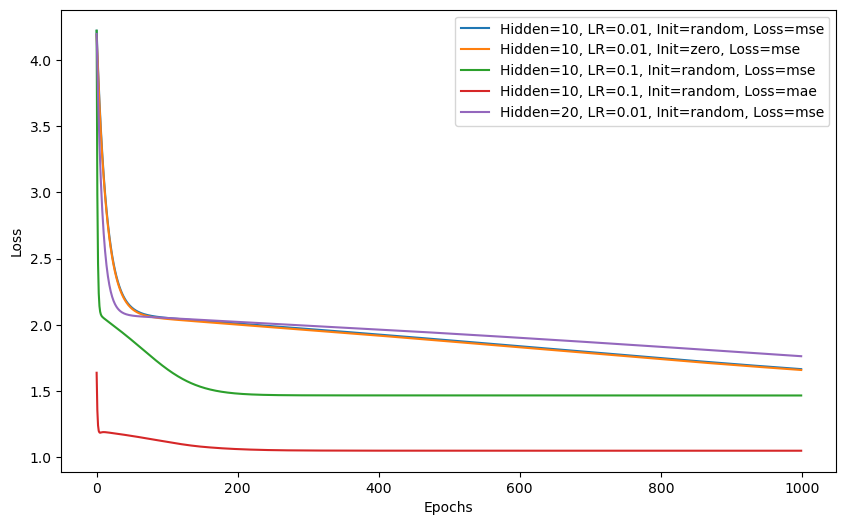

In [93]:
plt.figure(figsize=(10,6))
experiment(hidden_size=10, learning_rate=0.01, weight_init='random', loss_function='mse')
experiment(hidden_size=10, learning_rate=0.01, weight_init='zero', loss_function='mse')
experiment(hidden_size=10, learning_rate=0.1, weight_init='random', loss_function='mse')
experiment(hidden_size=10, learning_rate=0.1, weight_init='random', loss_function='mae')
experiment(hidden_size=20, learning_rate=0.01, weight_init='random', loss_function='mse')
plt.show()


(a) Weight Initializations: Zero vs. Random Weights
	•	The curve labeled “Init=zero” (orange) converges slower and reaches a higher final loss compared to “Init=random” (blue).
	•	This happens because when weights are initialized to zero, all neurons in the hidden layer learn the same features, preventing the network from learning complex patterns.
	•	In contrast, random initialization allows diverse learning, leading to better convergence and a lower final loss.

(b) Two Different Learning Rates
	•	Learning rate = 0.1 (green, red) shows significantly faster convergence compared to learning rate = 0.01 (blue, orange, purple).
	•	A higher learning rate allows the model to make larger updates, reducing the loss faster.
	•	However, if the learning rate is too high, it might overshoot and become unstable. Here, 0.1 seems effective without divergence.
	•	The lower learning rate (0.01) results in slower convergence and higher loss values over the same number of epochs.

(c) Two Loss Functions: Mean Squared Error (MSE) vs. Mean Absolute Error (MAE)
	•	The red curve (MAE, LR=0.1) has a lower final loss compared to MSE curves (blue, orange, green, purple).
	•	MAE is less sensitive to outliers, leading to more stable learning, while MSE penalizes large errors more, sometimes making convergence slower.
	•	MSE curves have a smoother, slower decline, while MAE shows faster initial loss reduction.

(d) Changing the Number of Hidden Layer Nodes
	•	The purple curve (Hidden=20, LR=0.01, MSE) shows slower convergence compared to blue (Hidden=10, LR=0.01, MSE).
	•	Increasing hidden nodes enhances the model’s ability to fit complex functions, but it may slow down training due to more parameters to optimize.
	•	In this case, with the same learning rate, more hidden nodes led to slightly better final performance but took longer to converge.
